In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression

In [3]:
g2_df = pd.read_csv("/Users/chenzhibin/Desktop/MA_data/g2_data.csv", index_col=0)
g3_df = pd.read_csv("/Users/chenzhibin/Desktop/MA_data/g3_data.csv", index_col=0)

In [4]:
g2_df

,pid,gender,birth_year,urban,familysize,edu_level,edu_level_f,edu_level_m,edu_level_parent,edu_percentile_score,edu_percentile_score_parent,living_area,edu_improvement,edu_rank_improvement,edu_year,edu_year_f,edu_year_m,eduy_parent,eduy_improvement
0,100051501.0,Female,1969.0,1.0,3.0,4.0,2.0,1.0,1.5,0.911794,0.782161,urban,2.5,0.129632,12.0,6.0,3.0,4.5,7.5
1,100051502.0,Male,1966.0,1.0,3.0,4.0,1.0,1.0,1.0,0.911794,0.354034,urban,3.0,0.557760,12.0,3.0,3.0,3.0,9.0
10,102571551.0,Female,1945.0,0.0,3.0,1.0,1.0,1.0,1.0,0.191167,0.354034,rural,0.0,-0.162867,3.0,3.0,3.0,3.0,0.0
11,102571552.0,Male,1948.0,0.0,3.0,2.0,1.0,1.0,1.0,0.497409,0.354034,rural,1.0,0.143375,6.0,3.0,3.0,3.0,3.0
35,110006101.0,Male,1960.0,1.0,3.0,3.0,1.0,1.0,1.0,0.732494,0.354034,urban,2.0,0.378460,9.0,3.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53241,621343203.0,Female,1968.0,1.0,8.0,1.0,3.0,1.0,2.0,0.191167,0.895460,urban,-1.0,-0.704293,3.0,9.0,3.0,6.0,-3.0
53249,441118204.0,Male,1968.0,1.0,3.0,3.0,1.0,1.0,1.0,0.732494,0.354034,urban,2.0,0.378460,9.0,3.0,3.0,3.0,6.0
53282,669499651.0,Male,1959.0,0.0,3.0,3.0,1.0,1.0,1.0,0.732494,0.354034,rural,2.0,0.378460,9.0,3.0,3.0,3.0,6.0
53283,669499652.0,Female,1959.0,0.0,3.0,1.0,1.0,1.0,1.0,0.191167,0.354034,rural,0.0,-0.162867,3.0,3.0,3.0,3.0,0.0


In [236]:
g2_df.describe()

,pid,birth_year,urban,familysize,edu_level,edu_level_f,edu_level_m,edu_level_parent,edu_percentile_score,edu_percentile_score_parent,edu_improvement,edu_rank_improvement,edu_year,edu_year_f,edu_year_m,eduy_parent,eduy_improvement
count,2.026500e+04,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000,2.026500e+04,20265.000000,20265.000000,20265.000000,20265.000000,20265.000000
mean,3.814807e+08,1956.782235,0.434690,4.045941,2.189835,1.407155,1.157217,1.282186,0.500025,0.500025,0.907649,1.180496e-15,6.553886,4.211004,3.468739,3.839872,2.714014
std,1.476185e+08,8.198028,0.495729,2.000027,1.174280,0.823005,0.513685,0.568018,0.276357,0.231180,1.149502,3.059260e-01,3.475374,2.412271,1.511511,1.668156,3.396505
min,1.000515e+08,1940.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.191167,0.354034,-5.000000,-8.082408e-01,3.000000,3.000000,3.000000,3.000000,-12.000000
25%,2.305581e+08,1950.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.191167,0.354034,0.000000,-1.628670e-01,3.000000,3.000000,3.000000,3.000000,0.000000
50%,4.104281e+08,1957.000000,0.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.497409,0.354034,1.000000,-6.415001e-02,6.000000,3.000000,3.000000,3.000000,3.000000
75%,5.003171e+08,1964.000000,1.000000,5.000000,3.000000,2.000000,1.000000,1.500000,0.732494,0.782161,2.000000,1.433753e-01,9.000000,6.000000,3.000000,4.500000,6.000000
max,9.623774e+08,1969.000000,1.000000,19.000000,7.000000,8.000000,8.000000,8.000000,0.999803,1.000000,6.000000,6.457686e-01,18.500000,21.000000,21.000000,21.000000,15.500000


In [237]:
g3_df

,pid,gender,birth_year,urban,familysize,edu_level,edu_level_f,edu_level_m,edu_level_parent,edu_percentile_score,edu_percentile_score_parent,living_area,edu_improvement,edu_rank_improvement,edu_year,edu_year_f,edu_year_m,eduy_parent,eduy_improvement
3,100453431.0,Male,1981.0,1.0,6.0,6.0,2.0,1.0,1.5,0.962661,0.384194,urban,4.5,0.578468,16.0,6.0,3.0,4.5,11.5
5,100810551.0,Female,1987.0,1.0,3.0,3.0,2.0,1.0,1.5,0.531324,0.384194,urban,1.5,0.147131,9.0,6.0,3.0,4.5,4.5
7,101274551.0,Male,1976.0,0.0,2.0,5.0,2.0,1.0,1.5,0.888329,0.384194,rural,3.5,0.504135,15.0,6.0,3.0,4.5,10.5
9,102438551.0,Female,1986.0,1.0,3.0,4.0,2.0,1.0,1.5,0.771520,0.384194,urban,2.5,0.387326,12.0,6.0,3.0,4.5,7.5
12,103465551.0,Female,1986.0,1.0,3.0,6.0,2.0,1.0,1.5,0.962661,0.384194,urban,4.5,0.578468,16.0,6.0,3.0,4.5,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53296,689452651.0,Male,1974.0,1.0,4.0,4.0,2.0,1.0,1.5,0.771520,0.384194,urban,2.5,0.387326,12.0,6.0,3.0,4.5,7.5
53297,689452652.0,Female,1975.0,1.0,4.0,3.0,3.0,2.0,2.5,0.531324,0.783924,urban,0.5,-0.252600,9.0,9.0,6.0,7.5,1.5
53299,693751656.0,Male,1983.0,0.0,7.0,2.0,2.0,1.0,1.5,0.254573,0.384194,rural,0.5,-0.129620,6.0,6.0,3.0,4.5,1.5
53305,760935651.0,Male,1985.0,1.0,5.0,4.0,2.0,3.0,2.5,0.771520,0.783924,urban,1.5,-0.012404,12.0,6.0,9.0,7.5,4.5


In [238]:

df_all_period = pd.concat([g2_df, g3_df], axis=0, ignore_index=True)


df_all_period['if_g2g3_period'] = 1
df_all_period.loc[df_all_period.index < len(g2_df), 'if_g2g3_period'] = 0


df_all_period

,pid,gender,birth_year,urban,familysize,edu_level,edu_level_f,edu_level_m,edu_level_parent,edu_percentile_score,edu_percentile_score_parent,living_area,edu_improvement,edu_rank_improvement,edu_year,edu_year_f,edu_year_m,eduy_parent,eduy_improvement,if_g2g3_period
0,100051501.0,Female,1969.0,1.0,3.0,4.0,2.0,1.0,1.5,0.911794,0.782161,urban,2.5,0.129632,12.0,6.0,3.0,4.5,7.5,0
1,100051502.0,Male,1966.0,1.0,3.0,4.0,1.0,1.0,1.0,0.911794,0.354034,urban,3.0,0.557760,12.0,3.0,3.0,3.0,9.0,0
2,102571551.0,Female,1945.0,0.0,3.0,1.0,1.0,1.0,1.0,0.191167,0.354034,rural,0.0,-0.162867,3.0,3.0,3.0,3.0,0.0,0
3,102571552.0,Male,1948.0,0.0,3.0,2.0,1.0,1.0,1.0,0.497409,0.354034,rural,1.0,0.143375,6.0,3.0,3.0,3.0,3.0,0
4,110006101.0,Male,1960.0,1.0,3.0,3.0,1.0,1.0,1.0,0.732494,0.354034,urban,2.0,0.378460,9.0,3.0,3.0,3.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36222,689452651.0,Male,1974.0,1.0,4.0,4.0,2.0,1.0,1.5,0.771520,0.384194,urban,2.5,0.387326,12.0,6.0,3.0,4.5,7.5,1
36223,689452652.0,Female,1975.0,1.0,4.0,3.0,3.0,2.0,2.5,0.531324,0.783924,urban,0.5,-0.252600,9.0,9.0,6.0,7.5,1.5,1
36224,693751656.0,Male,1983.0,0.0,7.0,2.0,2.0,1.0,1.5,0.254573,0.384194,rural,0.5,-0.129620,6.0,6.0,3.0,4.5,1.5,1
36225,760935651.0,Male,1985.0,1.0,5.0,4.0,2.0,3.0,2.5,0.771520,0.783924,urban,1.5,-0.012404,12.0,6.0,9.0,7.5,4.5,1


# Absolute education improvement (edu_year improvement)

In [239]:
g2_df[['eduy_improvement']].describe()

,eduy_improvement
count,20265.000000
mean,2.714014
std,3.396505
min,-12.000000
25%,0.000000
50%,3.000000
75%,6.000000
max,15.500000


In [240]:
g3_df[['eduy_improvement']].describe()

,eduy_improvement
count,15962.000000
mean,3.253414
std,3.651655
min,-10.500000
25%,0.000000
50%,3.000000
75%,6.000000
max,18.000000


In [241]:
t, p = ttest_ind(g2_df['eduy_improvement'], g3_df['eduy_improvement'])

print("t value is：", t)
print("p value is：", p)

t value is： -14.516260832756087
p value is： 1.300810582066304e-47


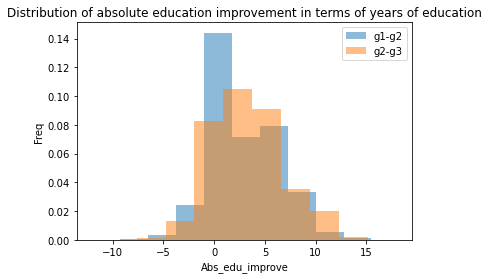

In [242]:
plt.hist(g2_df['eduy_improvement'], alpha=0.5, label='g1-g2', density = True)
plt.hist(g3_df['eduy_improvement'], alpha=0.5, label='g2-g3', density = True)
plt.legend(loc='upper right')
plt.title('Distribution of absolute education improvement in terms of years of education')
plt.xlabel('Abs_edu_improve')
plt.ylabel('Freq')
plt.show()

In [243]:
Y = df_all_period['eduy_improvement']
X = df_all_period[['if_g2g3_period']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.006      
Dependent Variable: eduy_improvement AIC:                193809.1804
Date:               2023-05-04 18:29 BIC:                193826.1755
No. Observations:   36227            Log-Likelihood:     -96903.    
Df Model:           1                F-statistic:        210.7      
Df Residuals:       36225            Prob (F-statistic): 1.30e-47   
R-squared:          0.006            Scale:              12.329     
---------------------------------------------------------------------
                   Coef.   Std.Err.     t      P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const              2.7140    0.0247  110.0344  0.0000  2.6657  2.7624
if_g2g3_period     0.5394    0.0372   14.5163  0.0000  0.4666  0.6122
--------------------------------------------------------------------
Omnibus:              990.343       Durbin-Watson:          1.589   
Prob(Omnibus):        0.000         Jarque-Bera (JB):       1068.981
Skew:                 0.418         Prob(JB):               0.000   
Kurtosis:             2.896         Condition No.:          3       
====================================================================

"""

## gender

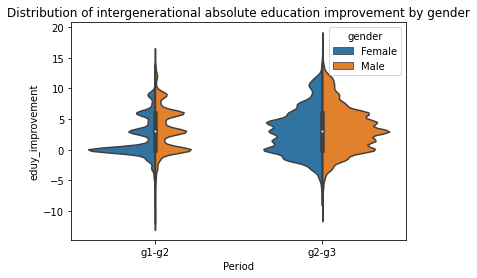

In [244]:
data = pd.concat([g2_df.assign(group='g1-g2'), g3_df.assign(group='g2-g3')])
sns.violinplot(x='group', y='eduy_improvement', hue='gender', data=data, split=True)
plt.title('Distribution of intergenerational absolute education improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()


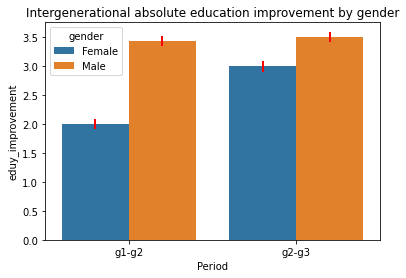

In [245]:
sns.barplot(x='group', y='eduy_improvement', hue='gender', data=data, ci=95, errcolor='red', errwidth=2)
plt.title('Intergenerational absolute education improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()

In [246]:
modely1_1 = smf.ols('eduy_improvement ~ if_g2g3_period + gender + if_g2g3_period*gender', data=df_all_period).fit()
modely1_2 = smf.ols('eduy_improvement ~ if_g2g3_period + gender', data=df_all_period).fit()

# 比较两个模型并计算LR统计量和p值
# 比较两个模型
lr_test = modely1_1.compare_lr_test(modely1_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0000
DF difference: 1.0000


In [247]:
print(modely1_1.summary())

                            OLS Regression Results                            
Dep. Variable:       eduy_improvement   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     387.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          9.85e-248
Time:                        18:32:52   Log-Likelihood:                -96436.
No. Observations:               36227   AIC:                         1.929e+05
Df Residuals:                   36223   BIC:                         1.929e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Living area

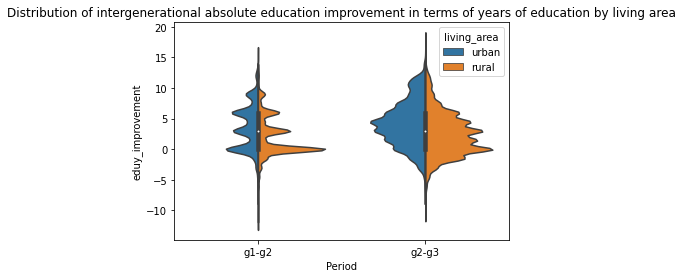

In [248]:
sns.violinplot(x='group', y='eduy_improvement', hue='living_area', data=data, split=True)
plt.title('Distribution of intergenerational absolute education improvement in terms of years of education by living area')
plt.xlabel('Period')

# Show the plot
plt.show()

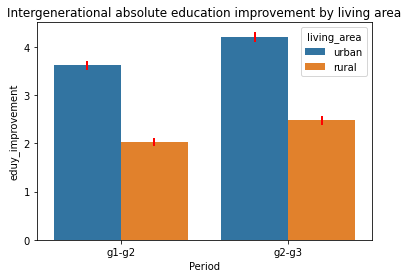

In [249]:
sns.barplot(x='group', y='eduy_improvement', hue='living_area', data=data, ci=95, errcolor='red', errwidth=2)
plt.title('Intergenerational absolute education improvement by living area')
plt.xlabel('Period')

# Show the plot
plt.show()

In [250]:
modely2_1 = smf.ols('eduy_improvement ~ if_g2g3_period + living_area + if_g2g3_period*living_area', data=df_all_period).fit()
modely2_2 = smf.ols('eduy_improvement ~ if_g2g3_period + living_area', data=df_all_period).fit()

# 比较两个模型并计算LR统计量和p值
# 比较两个模型
lr_test = modely2_1.compare_lr_test(modely2_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0537
DF difference: 1.0000


In [251]:
modely2_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
=================================================================================
Model:                   OLS                  Adj. R-squared:         0.060      
Dependent Variable:      eduy_improvement     AIC:                    191769.7667
Date:                    2023-05-04 18:37     BIC:                    191803.7569
No. Observations:        36227                Log-Likelihood:         -95881.    
Df Model:                3                    F-statistic:            774.9      
Df Residuals:            36223                Prob (F-statistic):     0.00       
R-squared:               0.060                Scale:                  11.653     
---------------------------------------------------------------------------------
                                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                           2.0217   0.0319 63.3892 0.0000  1.9592 2.0842
living_area[T.urban]                1.5926   0.0484 32.9231 0.0000  1.4978 1.6874
if_g2g3_period                      0.4525   0.0484  9.3470 0.0000  0.3576 0.5474
if_g2g3_period:living_area[T.urban] 0.1403   0.0727  1.9295 0.0537 -0.0022 0.2829
---------------------------------------------------------------------------------
Omnibus:                  724.519            Durbin-Watson:               1.673  
Prob(Omnibus):            0.000              Jarque-Bera (JB):            768.672
Skew:                     0.357              Prob(JB):                    0.000  
Kurtosis:                 2.988              Condition No.:               6      
=================================================================================

"""

## Family size

In [253]:
X_g2 = g2_df[['familysize']]
y_g2 = g2_df['eduy_improvement']

X_g3 = g3_df[['familysize']]
y_g3 = g3_df['eduy_improvement']

In [254]:
model_g2 = LinearRegression()

model_g2.fit(X_g2, y_g2)

model_g3 = LinearRegression()

model_g3.fit(X_g3, y_g3)

LinearRegression()

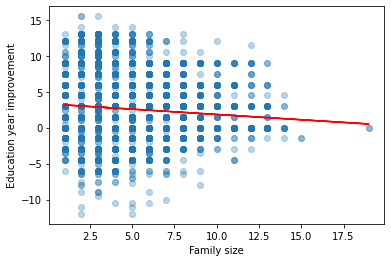

In [255]:
plt.scatter(X_g2, y_g2, alpha=0.3)

plt.plot(X_g2, model_g2.predict(X_g2), color='r')

plt.xlabel('Family size')
plt.ylabel('Education year improvement')
plt.show()

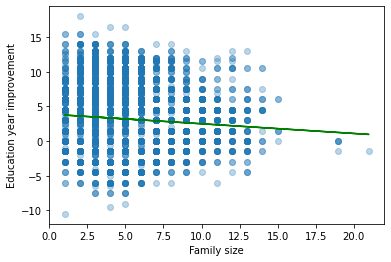

In [256]:
plt.scatter(X_g3, y_g3, alpha=0.3)
plt.plot(X_g3, model_g3.predict(X_g3), color='g')
plt.xlabel('Family size')
plt.ylabel('Education year improvement')
plt.show()

In [257]:
X_g2 = sm.add_constant(X_g2) # 加上常数项
model_g2_sm = sm.OLS(y_g2, X_g2).fit()
model_g2_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.007      
Dependent Variable: eduy_improvement AIC:                106917.5389
Date:               2023-05-04 18:49 BIC:                106933.3722
No. Observations:   20265            Log-Likelihood:     -53457.    
Df Model:           1                F-statistic:        153.5      
Df Residuals:       20263            Prob (F-statistic): 3.93e-35   
R-squared:          0.008            Scale:              11.450     
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            3.3099    0.0536   61.7039  0.0000   3.2047   3.4150
familysize      -0.1473    0.0119  -12.3909  0.0000  -0.1706  -0.1240
--------------------------------------------------------------------
Omnibus:               653.047       Durbin-Watson:          1.633  
Prob(Omnibus):         0.000         Jarque-Bera (JB):       713.539
Skew:                  0.455         Prob(JB):               0.000  
Kurtosis:              2.877         Condition No.:          11     
====================================================================

"""

In [258]:
X_g3 = sm.add_constant(X_g3) # 加上常数项
model_g3_sm = sm.OLS(y_g3, X_g3).fit()
model_g3_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.006     
Dependent Variable: eduy_improvement AIC:                86551.1311
Date:               2023-05-04 18:50 BIC:                86566.4871
No. Observations:   15962            Log-Likelihood:     -43274.   
Df Model:           1                F-statistic:        97.69     
Df Residuals:       15960            Prob (F-statistic): 5.69e-23  
R-squared:          0.006            Scale:              13.254    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            3.8916    0.0707  55.0398  0.0000   3.7530   4.0302
familysize      -0.1395    0.0141  -9.8839  0.0000  -0.1672  -0.1118
-------------------------------------------------------------------
Omnibus:              317.555       Durbin-Watson:          1.575  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       335.119
Skew:                 0.351         Prob(JB):               0.000  
Kurtosis:             2.899         Condition No.:          13     
===================================================================

"""

In [260]:
modely3_1 = smf.ols('eduy_improvement ~ if_g2g3_period + familysize + if_g2g3_period*familysize', data=df_all_period).fit()
print(modely3_1.summary2())

                     Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.012      
Dependent Variable:   eduy_improvement   AIC:                  193564.6975
Date:                 2023-05-04 18:51   BIC:                  193598.6878
No. Observations:     36227              Log-Likelihood:       -96778.    
Df Model:             3                  F-statistic:          153.8      
Df Residuals:         36223              Prob (F-statistic):   4.55e-99   
R-squared:            0.013              Scale:                12.245     
--------------------------------------------------------------------------
                           Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                  3.3099   0.0555  59.6673 0.0000  3.2011  3.4186
if_g2g3_period             0.5817   0.0877   6.6313 0.0000  0.4098  0.7537
familysize                -0.1473   0.0123 -11.

# Absolute education improvement

In [129]:
g2_df[['edu_improvement']].describe()

,edu_improvement
count,21665.000000
mean,0.947150
std,1.166872
min,-5.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,6.000000


In [130]:
g3_df[['edu_improvement']].describe()

,edu_improvement
count,17099.000000
mean,1.145856
std,1.297920
min,-3.500000
25%,0.000000
50%,1.000000
75%,2.000000
max,7.000000


In [131]:
t, p = ttest_ind(g2_df['edu_improvement'], g3_df['edu_improvement'])

print("t value is：", t)
print("p value is：", p)

t value is： -15.839047227462133
p value is： 2.5149309574185074e-56


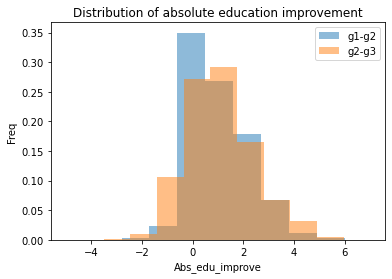

In [223]:
plt.hist(g2_df['edu_improvement'], alpha=0.5, label='g1-g2', density = True)
plt.hist(g3_df['edu_improvement'], alpha=0.5, label='g2-g3', density = True)
plt.legend(loc='upper right')
plt.title('Distribution of absolute education improvement')
plt.xlabel('Abs_edu_improve')
plt.ylabel('Freq')
plt.show()

In [133]:
Y = df_all_period['edu_improvement']
X = df_all_period[['if_g2g3_period']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.006      
Dependent Variable: edu_improvement  AIC:                125831.9260
Date:               2023-05-02 18:47 BIC:                125849.0565
No. Observations:   38764            Log-Likelihood:     -62914.    
Df Model:           1                F-statistic:        250.9      
Df Residuals:       38762            Prob (F-statistic): 2.51e-56   
R-squared:          0.006            Scale:              1.5041     
---------------------------------------------------------------------
                   Coef.   Std.Err.     t      P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const              0.9471    0.0083  113.6748  0.0000  0.9308  0.9635
if_g2g3_period     0.1987    0.0125   15.8390  0.0000  0.1741  0.2233
--------------------------------------------------------------------
Omnibus:             1792.258       Durbin-Watson:          1.559   
Prob(Omnibus):       0.000          Jarque-Bera (JB):       2058.434
Skew:                0.542          Prob(JB):               0.000   
Kurtosis:            3.315          Condition No.:          3       
====================================================================

"""

## Gender

In [ ]:
data = pd.concat([g2_df.assign(group='g1-g2'), g3_df.assign(group='g2-g3')])

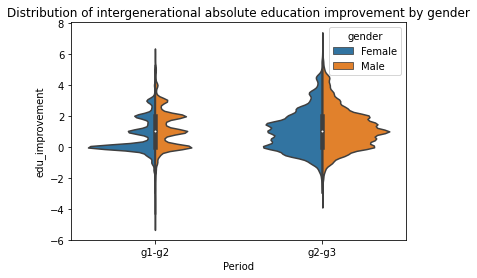

In [192]:
sns.violinplot(x='group', y='edu_improvement', hue='gender', data=data, split=True)
plt.title('Distribution of intergenerational absolute education improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()

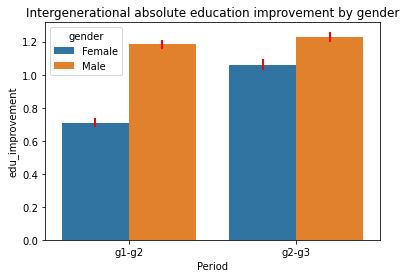

In [193]:
sns.barplot(x='group', y='edu_improvement', hue='gender', data=data, ci=95, errcolor='red', errwidth=2)
plt.title('Intergenerational absolute education improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()

In [201]:
!pip install --upgrade statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 2.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.0
    Uninstalling statsmodels-0.13.0:
      Successfully uninstalled statsmodels-0.13.0
You should consider upgrading via the '/Library/anaconda3/bin/python -m pip install --upgrade pip' command.


In [204]:
model1_1 = smf.ols('edu_improvement ~ if_g2g3_period + gender + if_g2g3_period*gender', data=df_all_period).fit()
model1_2 = smf.ols('edu_improvement ~ if_g2g3_period + gender', data=df_all_period).fit()

# 比较两个模型并计算LR统计量和p值
# 比较两个模型
lr_test = model1_1.compare_lr_test(model1_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0000
DF difference: 1.0000


In [143]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        edu_improvement   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     390.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          6.26e-250
Time:                        19:08:32   Log-Likelihood:                -62462.
No. Observations:               38764   AIC:                         1.249e+05
Df Residuals:                   38760   BIC:                         1.250e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Living area

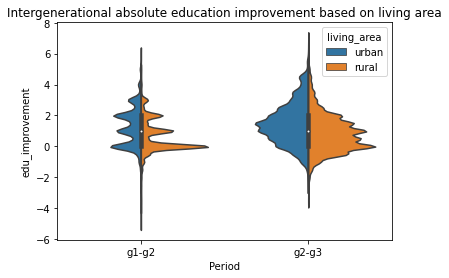

In [142]:
sns.violinplot(x='group', y='edu_improvement', hue='living_area', data=data, split=True)
plt.title('Intergenerational absolute education improvement based on living area')
plt.xlabel('Period')

# Show the plot
plt.show()

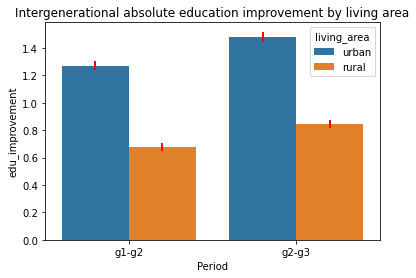

In [194]:
sns.barplot(x='group', y='edu_improvement', hue='living_area', data=data, ci=95, errcolor='red', errwidth=2)
plt.title('Intergenerational absolute education improvement by living area')
plt.xlabel('Period')

# Show the plot
plt.show()

In [205]:
model2_1 = smf.ols('edu_improvement ~ if_g2g3_period + living_area + if_g2g3_period*living_area', data=df_all_period).fit()
model2_2 = smf.ols('edu_improvement ~ if_g2g3_period + living_area', data=df_all_period).fit()

# 比较两个模型并计算LR统计量和p值
# 比较两个模型
lr_test = model2_1.compare_lr_test(model2_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0870
DF difference: 1.0000


In [207]:
# 输出模型摘要信息
print(model2_2.summary())

                            OLS Regression Results                            
Dep. Variable:        edu_improvement   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1414.
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        01:21:54   Log-Likelihood:                -61674.
No. Observations:               38764   AIC:                         1.234e+05
Df Residuals:                   38761   BIC:                         1.234e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6693 

## Family size

In [148]:
X_g2 = g2_df[['real_familysize']]
y_g2 = g2_df['edu_improvement']

X_g3 = g3_df[['real_familysize']]
y_g3 = g3_df['edu_improvement']

In [155]:
model_g2 = LinearRegression()

model_g2.fit(X_g2, y_g2)

model_g3 = LinearRegression()

model_g3.fit(X_g3, y_g3)

LinearRegression()

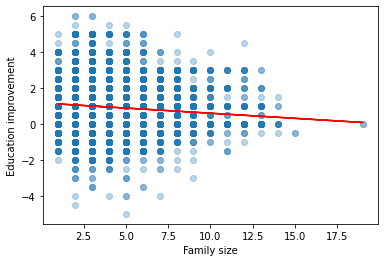

In [160]:
plt.scatter(X_g2, y_g2, alpha=0.3)

plt.plot(X_g2, model_g2.predict(X_g2), color='r')

plt.xlabel('Family size')
plt.ylabel('Education improvement')
plt.show()

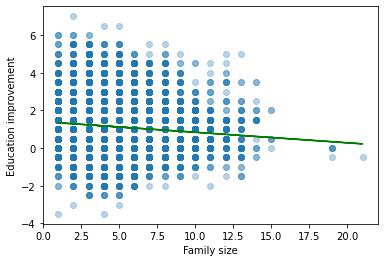

In [161]:
plt.scatter(X_g3, y_g3, alpha=0.3)
plt.plot(X_g3, model_g3.predict(X_g3), color='g')
plt.xlabel('Family size')
plt.ylabel('Education improvement')
plt.show()

In [162]:
X_g2 = sm.add_constant(X_g2) # 加上常数项
model_g2_sm = sm.OLS(y_g2, X_g2).fit()


X_g3 = sm.add_constant(X_g3) # 加上常数项
model_g3_sm = sm.OLS(y_g3, X_g3).fit()


In [163]:
model_g2_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.009     
Dependent Variable: edu_improvement  AIC:                67967.7585
Date:               2023-05-02 21:47 BIC:                67983.7254
No. Observations:   21665            Log-Likelihood:     -33982.   
Df Model:           1                F-statistic:        205.8     
Df Residuals:       21663            Prob (F-statistic): 1.88e-46  
R-squared:          0.009            Scale:              1.3488    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               1.1761   0.0178  66.0538 0.0000  1.1412  1.2110
real_familysize    -0.0572   0.0040 -14.3447 0.0000 -0.0650 -0.0494
-------------------------------------------------------------------
Omnibus:              845.559       Durbin-Watson:          1.596  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       947.280
Skew:                 0.501         Prob(JB):               0.000  
Kurtosis:             3.214         Condition No.:          10     
===================================================================

"""

In [164]:
model_g3_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.008     
Dependent Variable: edu_improvement  AIC:                57314.1992
Date:               2023-05-02 21:47 BIC:                57329.6928
No. Observations:   17099            Log-Likelihood:     -28655.   
Df Model:           1                F-statistic:        131.7     
Df Residuals:       17097            Prob (F-statistic): 2.22e-30  
R-squared:          0.008            Scale:              1.6718    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               1.3988   0.0242  57.9154 0.0000  1.3514  1.4461
real_familysize    -0.0560   0.0049 -11.4772 0.0000 -0.0656 -0.0465
-------------------------------------------------------------------
Omnibus:              791.974       Durbin-Watson:          1.558  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       909.576
Skew:                 0.541         Prob(JB):               0.000  
Kurtosis:             3.325         Condition No.:          12     
===================================================================

"""

In [208]:
model3_1 = smf.ols('edu_improvement ~ if_g2g3_period + real_familysize + if_g2g3_period*real_familysize', data=df_all_period).fit()
model3_2 = smf.ols('edu_improvement ~ if_g2g3_period + real_familysize', data=df_all_period).fit()

lr_test = model3_1.compare_lr_test(model3_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.8571
DF difference: 1.0000


In [209]:
# 输出模型摘要信息
print(model3_2.summary())

                            OLS Regression Results                            
Dep. Variable:        edu_improvement   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     293.4
Date:                Wed, 03 May 2023   Prob (F-statistic):          3.43e-127
Time:                        01:29:57   Log-Likelihood:                -62748.
No. Observations:               38764   AIC:                         1.255e+05
Df Residuals:                   38761   BIC:                         1.255e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1741      0.015     

# Education rank improvement

In [166]:
g2_df[['edu_rank_improvement']].describe()

,edu_rank_improvement
count,2.166500e+04
mean,-1.216792e-15
std,3.065573e-01
min,-8.130856e-01
25%,-1.711285e-01
50%,-6.452804e-02
75%,1.289176e-01
max,6.423725e-01


In [167]:
g3_df[['edu_rank_improvement']].describe()

,edu_rank_improvement
count,1.709900e+04
mean,-3.598818e-17
std,3.043618e-01
min,-9.213989e-01
25%,-1.784607e-01
50%,-3.520674e-02
75%,1.434002e-01
max,8.944675e-01


In [168]:
t, p = ttest_ind(g2_df['edu_rank_improvement'], g3_df['edu_rank_improvement'])

print("t value is：", t)
print("p value is：", p)

t value is： 6.3784297750409764e-15
p value is： 0.9999999999999949


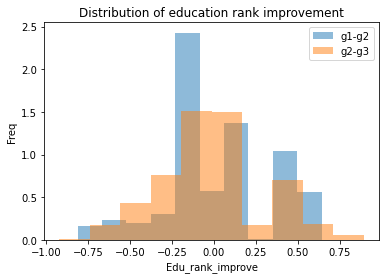

In [224]:
plt.hist(g2_df['edu_rank_improvement'], alpha=0.5, label='g1-g2', density = True)
plt.hist(g3_df['edu_rank_improvement'], alpha=0.5, label='g2-g3', density = True)
plt.legend(loc='upper right')
plt.title('Distribution of education rank improvement')
plt.xlabel('Edu_rank_improve')
plt.ylabel('Freq')
plt.show()

## Gender

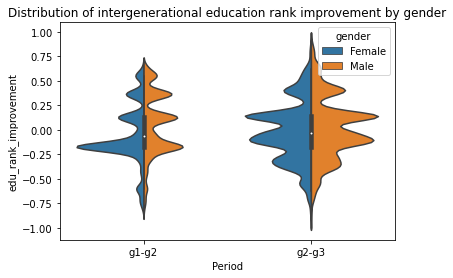

In [210]:
sns.violinplot(x='group', y='edu_rank_improvement', hue='gender', data=data, split=True)
plt.title('Distribution of intergenerational education rank improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()

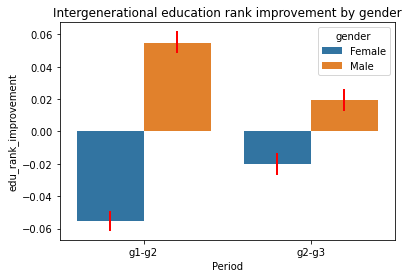

In [211]:
sns.barplot(x='group', y='edu_rank_improvement', hue='gender', data=data, ci=95, errcolor='red', errwidth=2)
plt.title('Intergenerational education rank improvement by gender')
plt.xlabel('Period')

# Show the plot
plt.show()

In [212]:
model4_1 = smf.ols('edu_rank_improvement ~ if_g2g3_period + gender + if_g2g3_period*gender', data=df_all_period).fit()
model4_2 = smf.ols('edu_rank_improvement ~ if_g2g3_period + gender', data=df_all_period).fit()

lr_test = model4_1.compare_lr_test(model4_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0000
DF difference: 1.0000


In [213]:
# 输出模型摘要信息
print(model4_1.summary2())

                       Results: Ordinary least squares
Model:                 OLS                    Adj. R-squared:       0.020     
Dependent Variable:    edu_rank_improvement   AIC:                  17320.9561
Date:                  2023-05-03 01:48       BIC:                  17355.2171
No. Observations:      38764                  Log-Likelihood:       -8656.5   
Df Model:              3                      F-statistic:          263.4     
Df Residuals:          38760                  Prob (F-statistic):   2.90e-169 
R-squared:             0.020                  Scale:                0.091524  
------------------------------------------------------------------------------
                               Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -0.0551   0.0029 -18.9500 0.0000 -0.0608 -0.0494
gender[T.Male]                 0.1100   0.0041  26.7690 0.0000  0.1020  0.11

## Living Area

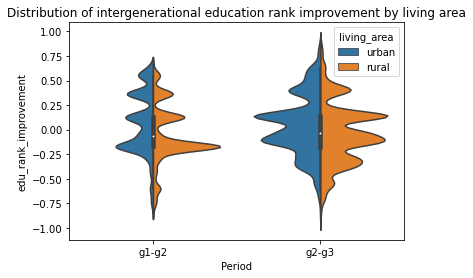

In [214]:
sns.violinplot(x='group', y='edu_rank_improvement', hue='living_area', data=data, split=True)
plt.title('Distribution of intergenerational education rank improvement by living area')
plt.xlabel('Period')

# Show the plot
plt.show()

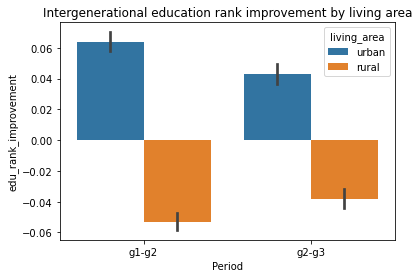

In [216]:
sns.barplot(x='group', y='edu_rank_improvement', hue='living_area', data=data)
plt.title('Intergenerational education rank improvement by living area')
plt.xlabel('Period')

# Show the plot
plt.show()

In [217]:
model5_1 = smf.ols('edu_rank_improvement ~ if_g2g3_period + living_area + if_g2g3_period*living_area', data=df_all_period).fit()
model5_2 = smf.ols('edu_rank_improvement ~ if_g2g3_period + living_area', data=df_all_period).fit()

lr_test = model5_1.compare_lr_test(model5_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0000
DF difference: 1.0000


In [218]:
# 输出模型摘要信息
print(model5_1.summary2())

                          Results: Ordinary least squares
Model:                   OLS                      Adj. R-squared:         0.028     
Dependent Variable:      edu_rank_improvement     AIC:                    17000.5118
Date:                    2023-05-03 01:55         BIC:                    17034.7728
No. Observations:        38764                    Log-Likelihood:         -8496.3   
Df Model:                3                        F-statistic:            372.9     
Df Residuals:            38760                    Prob (F-statistic):     9.12e-239 
R-squared:               0.028                    Scale:                  0.090771  
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------------------
Intercept                           -0.0530   0.0028 -19.1304 0.0000 -0.0584 -0.0475
living_

## Family size

In [175]:
X_g2 = g2_df[['real_familysize']]
y_g2 = g2_df['edu_rank_improvement']

X_g3 = g3_df[['real_familysize']]
y_g3 = g3_df['edu_rank_improvement']

In [176]:
model_g2_rank = LinearRegression()

model_g2_rank.fit(X_g2, y_g2)

model_g3_rank = LinearRegression()

model_g3_rank.fit(X_g3, y_g3)

LinearRegression()

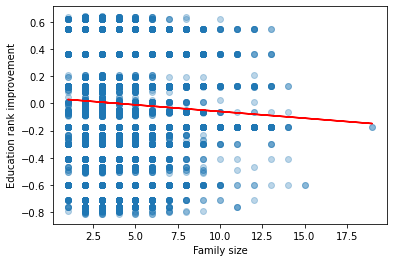

In [177]:
plt.scatter(X_g2, y_g2, alpha=0.3)

plt.plot(X_g2, model_g2_rank.predict(X_g2), color='r')

plt.xlabel('Family size')
plt.ylabel('Education rank improvement')
plt.show()

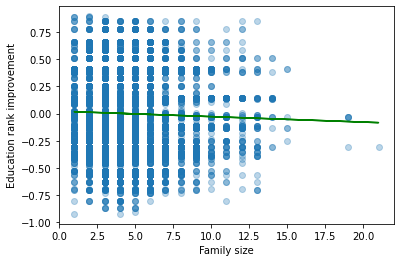

In [178]:
plt.scatter(X_g3, y_g3, alpha=0.3)
plt.plot(X_g3, model_g3_rank.predict(X_g3), color='g')
plt.xlabel('Family size')
plt.ylabel('Education rank improvement')
plt.show()

In [179]:
X_g2 = sm.add_constant(X_g2) # 加上常数项
model_g2_rank_sm = sm.OLS(y_g2, X_g2).fit()

model_g2_rank_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:              OLS                  Adj. R-squared:     0.004     
Dependent Variable: edu_rank_improvement AIC:                10166.5717
Date:               2023-05-03 00:33     BIC:                10182.5386
No. Observations:   21665                Log-Likelihood:     -5081.3   
Df Model:           1                    F-statistic:        87.96     
Df Residuals:       21663                Prob (F-statistic): 7.33e-21  
R-squared:          0.004                Scale:              0.093602  
------------------------------------------------------------------------
                     Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------------
const                0.0394    0.0047   8.4073  0.0000   0.0302   0.0486
real_familysize     -0.0098    0.0010  -9.3785  0.0000  -0.0119  -0.0078
-----------------------------------------------------------------------
Omnibus:                97.041         Durbin-Watson:            1.753 
Prob(Omnibus):          0.000          Jarque-Bera (JB):         71.433
Skew:                   0.006          Prob(JB):                 0.000 
Kurtosis:               2.719          Condition No.:            10    
=======================================================================

"""

In [180]:
X_g3 = sm.add_constant(X_g3) # 加上常数项
model_g3_rank_sm = sm.OLS(y_g3, X_g3).fit()
model_g3_rank_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:              OLS                  Adj. R-squared:     0.001    
Dependent Variable: edu_rank_improvement AIC:                7828.9191
Date:               2023-05-03 00:34     BIC:                7844.4127
No. Observations:   17099                Log-Likelihood:     -3912.5  
Df Model:           1                    F-statistic:        19.13    
Df Residuals:       17097                Prob (F-statistic): 1.23e-05 
R-squared:          0.001                Scale:              0.092538 
-----------------------------------------------------------------------
                    Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-----------------------------------------------------------------------
const               0.0227    0.0057   3.9900  0.0001   0.0115   0.0338
real_familysize    -0.0050    0.0011  -4.3733  0.0000  -0.0073  -0.0028
----------------------------------------------------------------------
Omnibus:               107.264        Durbin-Watson:           1.706  
Prob(Omnibus):         0.000          Jarque-Bera (JB):        102.272
Skew:                  0.163          Prob(JB):                0.000  
Kurtosis:              2.806          Condition No.:           12     
======================================================================

"""

In [219]:
model6_1 = smf.ols('edu_rank_improvement ~ if_g2g3_period + real_familysize + if_g2g3_period*real_familysize', data=df_all_period).fit()

model6_2 = smf.ols('edu_rank_improvement ~ if_g2g3_period + real_familysize', data=df_all_period).fit()

lr_test = model6_1.compare_lr_test(model6_2)

# 打印比较结果
print(f"LR Test p-value: {lr_test[1]:.4f}")
print(f"DF difference: {lr_test[2]:.4f}")

LR Test p-value: 0.0020
DF difference: 1.0000


In [220]:
print(model6_1.summary2())

                       Results: Ordinary least squares
Model:                 OLS                    Adj. R-squared:       0.003     
Dependent Variable:    edu_rank_improvement   AIC:                  17996.1174
Date:                  2023-05-03 01:57       BIC:                  18030.3784
No. Observations:      38764                  Log-Likelihood:       -8994.1   
Df Model:              3                      F-statistic:          35.80     
Df Residuals:          38760                  Prob (F-statistic):   4.27e-23  
R-squared:             0.003                  Scale:                0.093133  
------------------------------------------------------------------------------
                                Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                       0.0394   0.0047  8.4285 0.0000  0.0303  0.0486
if_g2g3_period                 -0.0168   0.0074 -2.2730 0.0230 -0.0312 -0.00